In [8]:
import pandas as pd
df = pd.read_csv (r'Diabetes_Pima.csv')
df.head()
df = df.drop('Patient ID', axis=1)

In [9]:
import numpy as np
df = df.dropna()
df.head()

,Pregnancies,PG Concentration,Diastolic BP,Tri Fold Thick,Serum Ins,BMI,DP Function,Age,Diabetes
0,5,108.0,72.0,43.0,75.0,36.1,0.263,33,Healthy
2,1,196.0,76.0,36.0,249.0,36.5,0.875,29,Sick
3,0,91.0,68.0,32.0,210.0,39.9,0.381,25,Healthy
4,2,117.0,90.0,19.0,71.0,25.2,0.313,21,Healthy
5,0,95.0,80.0,45.0,92.0,36.5,0.330,26,Healthy


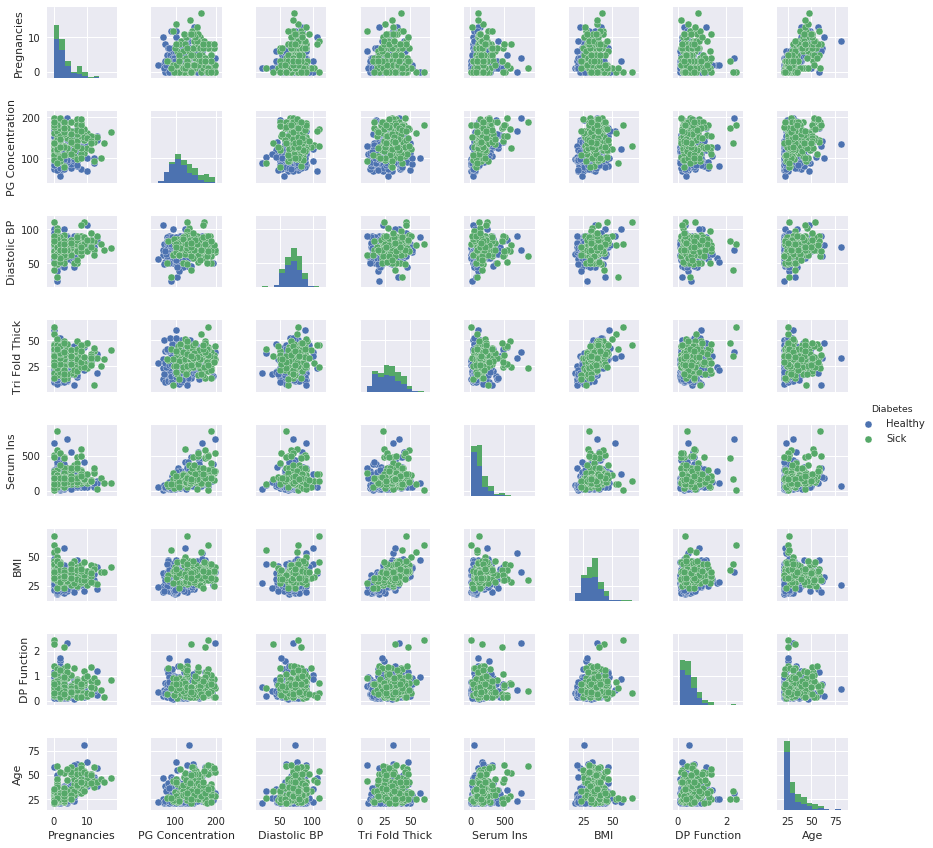

In [10]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(df, hue='Diabetes', size=1.5);

In [11]:
X_diabetes = df.drop('Diabetes', axis=1)
X_diabetes.shape

(392, 8)

In [12]:
y_diabetes = df['Diabetes']
y_diabetes.shape

(392,)

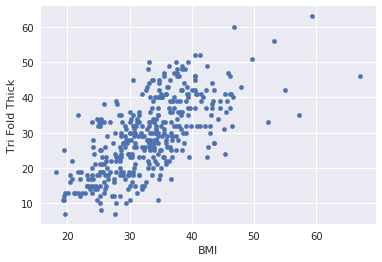

In [13]:
df.plot.scatter(x ='BMI', y = 'Tri Fold Thick')

In [14]:
#naive-bayes supervized learning ##splitting our dataset into training and testing groups
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_diabetes, y_diabetes,
                                                random_state=1)

In [15]:
## select model type generates the model
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data


In [16]:
#find out how well it works
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.7346938775510204

In [17]:
# PCA unsupervized learning generate model
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_diabetes)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_diabetes)         # 4. Transform the data to two dimensions

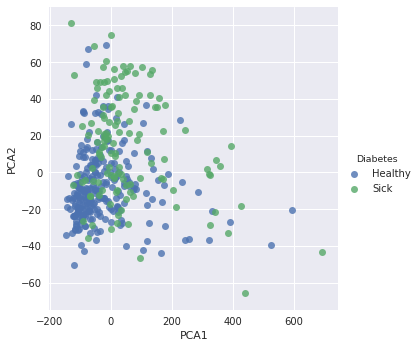

In [18]:
## visualize PCA results by generating a PC1 and PC2 scatterplot
df['PCA1'] = X_2D[:, 0]
df['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='Diabetes', data=df, fit_reg=False);

In [19]:
#unsupervized learning gaussian mixture model clustering using GMM fit the model
from sklearn.mixture import GMM      # 1. Choose the model class
model = GMM(n_components=3,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X_diabetes)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_diabetes)        # 4. Determine cluster labels


/opt/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Fun

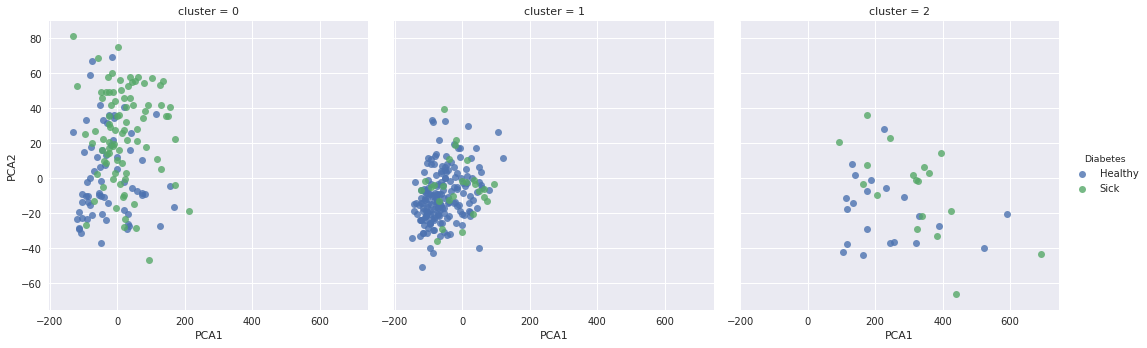

In [20]:
#split datapoints based on which cluster they were assigned 
#generate PCA scatterplots based on the clustered subsets
df['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=df, hue='Diabetes',
           col='cluster', fit_reg=False);